# Mental Health on the Map
- Shefali Verma
- Tessa Joesph
- Anvi Rakshe

## Abstract

This project seeks to examine the underlying factors contributing to mental health distress within the American population, focusing on the data from 2022 covering all 50 states. Through the analysis of state-wide health metrics provided by America's Health Rankings, we aim to uncover patterns shared among states that report high levels of mental health issues. The initiative also strives to identify at-risk communities that might be underreporting mental health concerns due to cultural or stigma-related barriers. By grouping communities based on mental health outcomes and correlating factors, such as location and environmental conditions, we aspire to understand the broader influences on mental health. This investigation will facilitate the identification of commonalities among affected groups and foster the development of targeted public health strategies.






## Introduction

Mental well-being often takes a back seat in health discussions, primarily due to the discomfort and stigma associated with it. Nevertheless, it is necessary to prioritize mental health issues as a critical public health concern, given their status as leading causes of morbidity and mortality globally. While existing interventions such as medications and therapy offer relief to those already grappling with mental health problems, this reactive approach only addresses individual cases.

As medical professionals and researchers tirelessly pursue cures, there is a notable lack of emphasis on the proactive prevention of mental health challenges at a broader level. Adding to this issue, certain communities may harbor pervasive stigmas surrounding mental health, leading to potential underreporting or even completely disregarding cases of mental distress within their population.

Through a comprehensive examination of health and socioeconomic characteristics across American states, coupled with Frequent Mental Distress data, there may be an opportunity to predict the likelihood of mental health distress in communities where underreporting of mental health issues may be a concern.

We ask ourselves, what are the indicators of mental distress within a population? And how can we identify other communities with low positive mental-health outcomes?

We scraped data from  [America's Health Rankings.org](https://www.americashealthrankings.org/). This site offers in-depth health-related data of each state in the United States. It not only describes the States' mental health data, like their average number of poor mental health days per month, or percentage of adults who experience frequent mental distress, but also contains comprehensive data about the State's health behaviors, access to clinical care, social and economic data, and physical environment/infrastructural data.


## Data Description

Our analysis revolves around a comprehensive dataset that scrutinizes various factors potentially affecting mental health across all 50 U.S. states. The data, sourced from America's Health Rankings Website for the year 2022, includes a wide spectrum of indicators that may have implications on the prevalence of mental health issues at the state level.

For scraping the America's Health Rankings Website:

`scrape_state_data(state_code)` builds a dataframe for each state based on the state code put through the function. This is the only function we have for scraping the website. The dataframes for each state will then be concatenated and cleaned:

We first use a dictionary with all the states and respective state codes to generate 50 dataframes using the scrape_state_data function. Then we combines all 50 dataframes together to make one comprehensive one. Then we clean the dataframe, getting rid of rows with missing values, making all values numerical, etc.

This is what the first few rows and columns of the final data frame look like:




| Category                    | AL    | AK    | AZ    | AR    | CA    | CO    | CT    | DE    | FL    | GA    | HI    | ID    | IL    | IN    | IA    |
|-----------------------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| Social and Economic Factors | -0.377| -0.286| -0.177| -0.742| -0.126| 0.299 | 0.438 | 0.265 | 0.146 | -0.051| 0.397 | -0.035| 0.059 | -0.067| 0.491 |
| Community and Family Safety - Annual | -0.398| -0.909| -0.426| -1.070| 0.077 | 0.027 | 0.729 | -0.008| -0.205| -0.299| 0.924 | 0.631 | -0.028| -0.534| 0.196 |
| Firearm Deaths             | 23.400| 24.000| 17.100| 22.500| 8.700 | 15.700| 6.100 | 14.200| 13.900| 17.700| 3.500 | 18.100| 13.900| 17.300| 11.200|
| Occupational Fatalities     | 5.700 | 8.600 | 4.000 | 5.900 | 3.200 | 3.600 | 3.600 | 4.300 | 4.500 | 5.500 | 4.100 | 4.300 | 3.400 | 6.900 | 5.600 |
| Public Health Funding ($)   | 129.000| 449.000| 79.000| 128.000| 138.000| 127.000| 126.000| 152.000| 79.000 | 107.000| 241.000| 172.000| 109.000| 76.000 | 161.000|
| Violent Crime               | 454.000| 838.000| 485.000| 672.000| 442.000| 423.000| 182.000| 432.000| 384.000| 400.000| 254.000| 243.000| 426.000| 358.000| 304.000|

These are the key components of our dataset:

- Health Distress Indicators: We look at data that reflects the frequency and intensity of mental distress experienced by the population.

- Healthcare Access: Parameters evaluating the availability and quality of mental healthcare services, including the number of mental health providers per capita and the percentage of residents with health insurance coverage.

- Socioeconomic Factors: Data points considering the impact of employment rates, education levels, and income inequality on mental well-being.

- Lifestyle and Community Metrics: Variables assessing the role of physical activity, diet, substance abuse, and community support in mental health.

- Environmental Influences: Information on how factors such as air quality, urbanization, and access to green spaces correlate with mental health outcomes.

## Pipeline Overview

#### Data retrieval from the America's Health Rankings Website:

Our `scrape_state_data(state_code)` function builds a dataframe for each state based on the two-letter state code put through the function.


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


def scrape_state_data(state_code):
    '''
    This function scrapes the americas health ranking website and returns a dataframe of a states health metrics

    Args: 2 letter state code (str)

    Returns: state health metrics table (dataframe)

    '''
    url = f"https://www.americashealthrankings.org/explore/states/{state_code}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    names = []
    percentages = []
    values = []

    elements = soup.find_all("div", class_="MeasuresChart_container__yCiob")

    for element in elements:
        name = element.find("h4", class_="MeasuresChart_name___lNMI")
        percentage = element.find("p", class_="MeasuresChart_value__ag56B")
        value = element.find_all("p", class_="MeasuresChart_value__ag56B")

        if name and percentage and value:
            names.append(name.text)
            percentages.append(percentage.text)
            values.append(value[1].text)

    data = {"Category": names, "Value": percentages, "Ranking (Out of 50 States)": values}
    df_state = pd.DataFrame(data)
    return df_state

### The Big DataFrame: Generation and Concatenation

The next code uses a dictionary with all the states and respective state codes to generate 50 dataframes using the `scrape_state_data` function. The second combines all 50 dataframes together to make one comprehensive one.

 The third code cleans the dataframe, getting rid of rows with missing values, making all values numerical, etc.

In [2]:
states_dict = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
    'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL',
    'Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD',
    'Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT',
    'Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY',
    'North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA',
    'Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT',
    'Vermont': 'VT','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
}

In [3]:
'''
This code runs all state codes through the scrape_state_data function, and returns a dictionary of all states dfs

'''
state_data_frames = {}
for state_name, state_code in states_dict.items():
    df = scrape_state_data(state_code)
    if df is not None:
        df.index = df["Category"]
        state_data_frames[state_name] = df
for state_name, df in state_data_frames.items():
    state_code = states_dict.get(state_name, 'Unknown')
    if state_code != 'Unknown':
        df[state_code] = df["Value"]
        del df["Value"]


'''
Concatenates all state dfs together, and makes the column the state code

'''
Concat_states = pd.DataFrame()
for state_name, df in state_data_frames.items():
    state_code = states_dict.get(state_name, 'Unknown')
    if state_code != 'Unknown':
        Concat_states[state_code] = df[state_code]

#### Cleaning the dataframe

 The folowing segment of code cleans the dataframe, getting rid of rows with missing values, making all values numerical, etc. Specific details of the code are written in docstrings.

In [4]:
'''
The original df had empty values as "•". This code changes those to NaN
'''
Concat_states.replace("•", float("nan"), inplace=True)
rows_to_remove = ["Climate and Health - Women and Children *", "Demographics - Annual *"]
Concat_states = Concat_states[~Concat_states.index.isin(rows_to_remove)]



'''
To make each value numerical, we needed to get rid of the "%" and "$" in the values.
Those things are still important to note though, so we added the symbols to the categories they fall under.

'''
for category in Concat_states.index:
    if any('$' in str(val) for val in Concat_states.loc[category]):
        new_category = category + " ( $)"
        Concat_states = Concat_states.rename(index={category: new_category})
for category in Concat_states.index:
    if any('%' in str(val) for val in Concat_states.loc[category]):
        new_category = category + " (%)"
        Concat_states = Concat_states.rename(index={category: new_category})


'''
This removes "†" and "*" from category names
'''
for category in Concat_states.index:
    if "†" in category or "*" in category:
        new_category = category.replace("†", "").replace("*", "")
        Concat_states = Concat_states.rename(index={category: new_category})



'''
This clean_value function removes the "$" and "%" from the values in the data frame

'''
def clean_value(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace('%', '')
    return value
for column in Concat_states.columns:
    Concat_states[column] = Concat_states[column].apply(clean_value)
Concat_states.columns = Concat_states.columns.str.replace('[*†]', '', regex=True)



rows_to_remove = ['Total Population', 'Risk-screening Environmental Indicator Score', 'Per Capita Income ( $)',
                        'Preventive Clinical Services - Annual', 'Childhood Immunizations (%)', 'Exercise (%)',
                'Less Than High School Education (%)', 'Preventable Hospitalizations', 'Premature Death', ]
Concat_states = Concat_states[~Concat_states.index.isin(rows_to_remove)]

Concat_states = Concat_states.apply(pd.to_numeric, errors='coerce')







###  The Final Dataframe

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Concat_states

AL       AK       AZ  \
Category                                                                
Social and Economic Factors                  -0.377   -0.286   -0.177   
Community and Family Safety - Annual         -0.398   -0.909   -0.426   
Firearm Deaths                               23.400   24.000   17.100   
Occupational Fatalities                       5.700    8.600    4.000   
Public Health Funding ( $)                  129.000  449.000   79.000   
Violent Crime                               454.000  838.000  485.000   
Economic Resources - Annual                  -0.948    0.544    0.114   
Economic Hardship Index                      75.000   48.000   72.000   
Crowded Housing  (%)                          1.600    5.500    4.700   
Dependency (Ages <18 or >64)  (%)            39.800   37.900   40.500   
Less Than High School Education  (%)         12.100    6.700   11.000   
Per Capita Income  ( $)                         NaN      NaN      NaN   
Poverty  (%)                                 16.100   10.700   12.100   
Unemployment  (%)                             5.300    7.000    5.800   
Food Insecurity (%)                          13.100    9.500   10.100   
Homeownership  (%)                           70.000   66.800   67.600   
Homeownership Racial Disparity               28.600   44.900   33.100   
Income Inequality                             5.270    4.480    4.350   
Education - Annual                            0.800   -1.203   -0.747   
Fourth Grade Reading Proficiency (%)         28.300   24.400   31.400   
High School Completion  (%)                  87.900   93.300   89.000   
High School Graduation (%)                   91.700   80.400   77.800   
High School Graduation Racial Disparity       3.000   17.700   15.600   
Social Support and Engagement - Annual       -0.745    0.024    0.125   
Adverse Childhood Experiences (%)            17.900   16.900   16.300   
High-Speed Internet (%)                      88.100   93.100   93.200   
Residential Segregation - Black/White        58.000   57.000   55.000   
Volunteerism (%)                             28.700   38.200   28.600   
Voter Participation (Average) (%)            55.600   58.300   65.400   
Physical Environment                         -0.111   -0.201   -0.093   
Air and Water Quality - Annual               -0.198   -0.523   -0.588   
Air Pollution                                 7.800    7.000   10.500   
Drinking Water Violations (%)                 0.300    4.800    0.500   
Non-Smoking Regulation  (%)                  13.400   47.100  100.000   
Water Fluoridation (%)                       78.000   49.600   58.000   
Climate Change Policies                       0.000    0.000    2.000   
Transportation Energy Use                    10.100   22.500    6.800   
Housing and Transit - Annual                  0.003    0.227    0.567   
Drive Alone to Work (%)                      80.500   66.200   65.800   
Housing With Lead Risk (%)                   11.100    7.100    6.600   
Severe Housing Problems (%)                  13.200   20.400   17.400   
Clinical Care                                -0.563   -0.438   -0.485   
Access to Care - Annual                      -0.960    0.230   -0.696   
Avoided Care Due to Cost (%)                 11.100   10.800   10.500   
Providers - Annual                           -1.373    1.957   -0.690   
Dental Care Providers                        40.600   89.900   55.000   
Mental Health Providers                     128.800  687.900  176.000   
Primary Care Providers                      223.200  342.000  239.900   
Uninsured (%)                                 9.900   11.400   10.700   
Preventive Clinical Services - Annual        -0.166   -1.165   -0.445   
Colorectal Cancer Screening (%)              76.900   70.300   69.500   
Dental Visit (%)                             61.400   62.500   61.200   
Immunizations - Annual                       -0.114   -1.318   -0.036   
Flu Vaccination (%)               

## Method

We are left with an extremely large dataframe with over 100 health factors which may or may not correlate with frequent mental distress. Our goal is to determine which health factors actually do have a correlation with mental distress and isolate them. Then, run those factors through a machine learning model to be able to predict a frequent mental distress value from the other factors. Finally, we wanted to be able to run example values through out model, and recieve a fairly accurate predicted Frequent mental distress Score.

Our first step was visualizing the relationship between each factor and frequent mental distress. This would give us a general idea of whether there are factors which are correlated.

Then, we constructed a correlation matrix using *scaled* values to determine which health metrics actually have any relationship with Frequent Mental Distress. We only considered those with a correlation of >|0.50|.

Finally, We used K-nearest neighbors to model the relationship between our chosen features predect mental distress outcomes from their values. Our data has already been scaled, reducing error

Our final function predict_mental_distress(selected_feature_values) will take any values for our chosen health metrics, and return a predicted frequent mental distress score



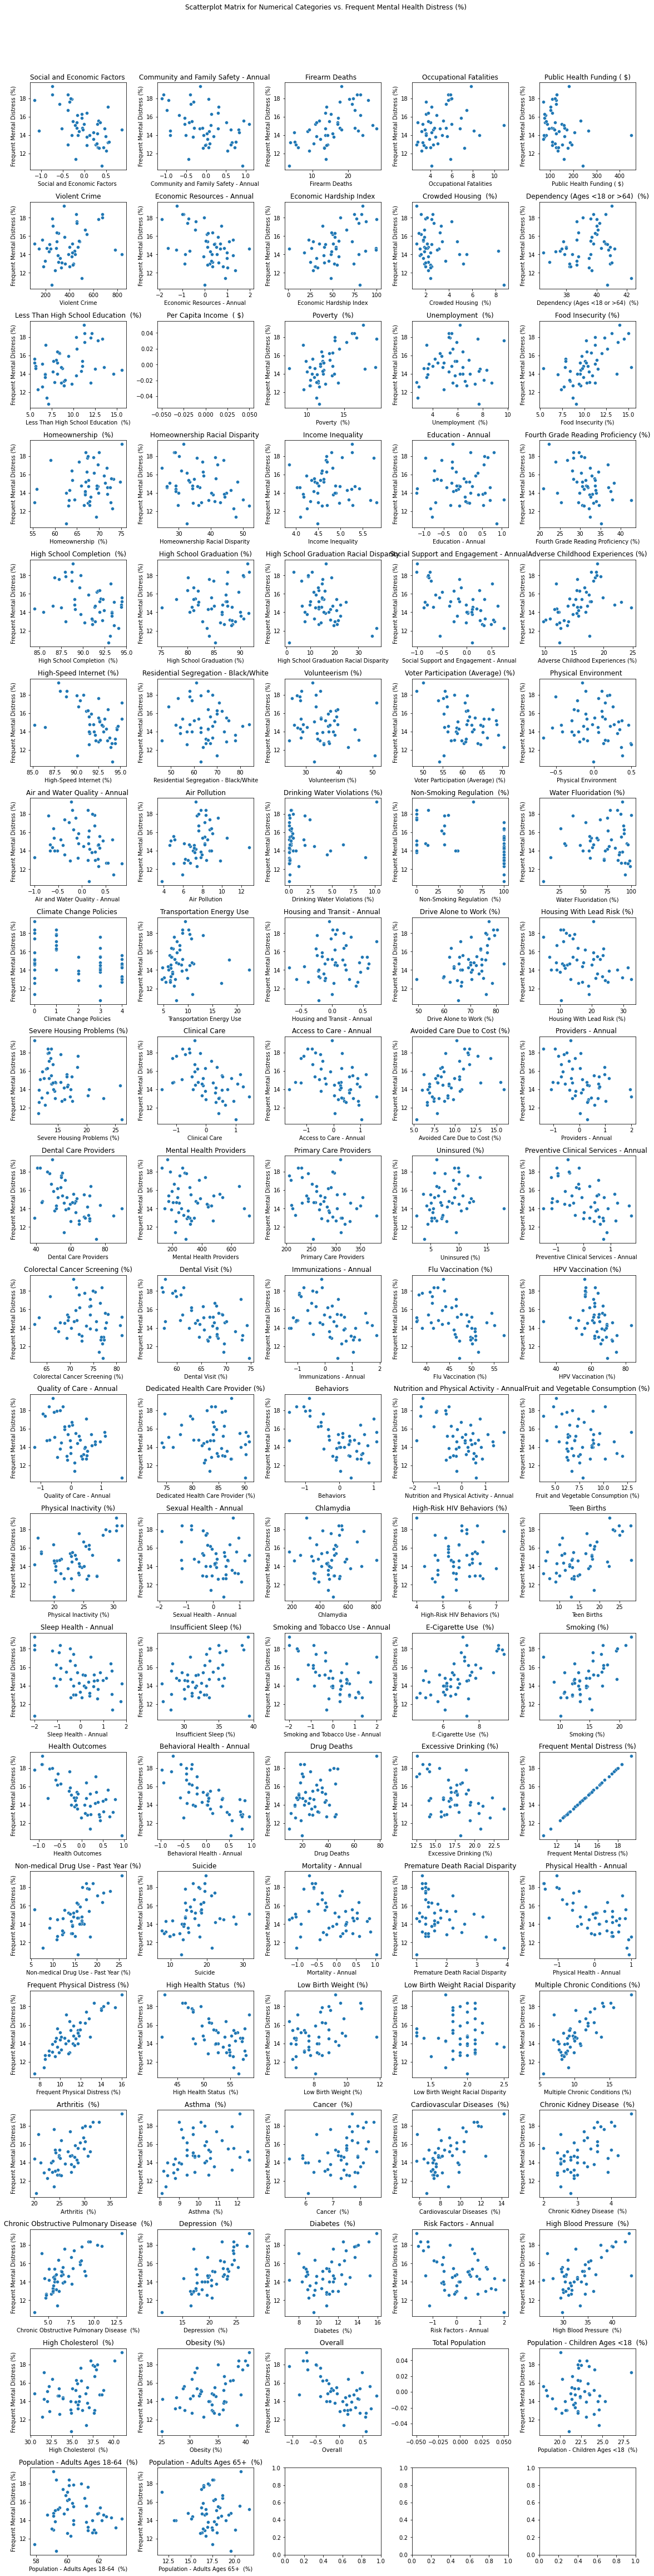

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

Concat_states_T = Concat_states.T

plots_per_row = 5

num_rows = -(-len(Concat_states_T.columns[:-1]) // plots_per_row)

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(16, num_rows * 3))

for i, category in enumerate(Concat_states_T.columns[:-1]):
    row, col = divmod(i, plots_per_row)
    ax = axes[row, col]
    sns.scatterplot(data=Concat_states_T, x=category, y='Frequent Mental Distress (%)', ax=ax)
    ax.set_title(category)


fig.suptitle("Scatterplot Matrix for Numerical Categories vs. Frequent Mental Health Distress (%)", y=1.02)

plt.tight_layout()

plt.show()

### Correlation Matrix

We wanted to determine which health metrics had any relationship with Frequent Mental Distress. We used a correlation matrix to better understand any positive or negative relationships between the features.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px


selected_columns = [col for col in Concat_states.T.columns if col != 'Total Population']
subset_data = Concat_states.T[selected_columns]
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(subset_data), columns=subset_data.columns)
correlation_matrix = scaled_data.corr()
frequent_mental_distress_correlations = correlation_matrix.loc[['Frequent Mental Distress (%)']]


fig = px.imshow(frequent_mental_distress_correlations, color_continuous_scale='plasma')

fig.update_layout(
    width=7000,
    height=900,
    xaxis_title="Features",
    yaxis_title="Frequent Mental Distress (%)",
    title="Correlation Heatmap with Frequent Mental Distress",
)

fig.show()





/Users/shefaliverma/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/shefaliverma/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/Users/shefaliverma/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [8]:
frequent_mental_distress_correlations = correlation_matrix.loc['Frequent Mental Distress (%)']

correlated_features = frequent_mental_distress_correlations[abs(frequent_mental_distress_correlations) > 0.5]
correlated_features_list = correlated_features.index.tolist()

correlated_features_dict = dict(correlated_features)
correlated_features_dict


{'Social and Economic Factors ': -0.5477924181072261,
 'Firearm Deaths  ': 0.5919978330259869,
 'Poverty  (%)': 0.5390017260014874,
 'Food Insecurity (%)': 0.5878308761479855,
 'Social Support and Engagement - Annual ': -0.5795639254748585,
 'Adverse Childhood Experiences (%)': 0.5060931075288495,
 'Clinical Care ': -0.5047843287069596,
 'Dental Visit (%)': -0.5983874871651206,
 'Flu Vaccination (%)': -0.5033863224189352,
 'Behaviors ': -0.5560908084544941,
 'Teen Births': 0.5520056298909204,
 'Smoking and Tobacco Use - Annual ': -0.615731951719718,
 'E-Cigarette Use  (%)': 0.6088476807310399,
 'Smoking (%)': 0.6111474495641277,
 'Health Outcomes ': -0.731890915915802,
 'Behavioral Health - Annual ': -0.7293429612036909,
 'Frequent Mental Distress (%)': 1.0,
 'Non-medical Drug Use - Past Year (%)': 0.618468390416807,
 'Physical Health - Annual ': -0.7037568697843575,
 'Frequent Physical Distress (%)': 0.8673222658825746,
 'High Health Status  (%)': -0.5914832020685461,
 'Multiple Chron

## Machine Learning

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd


selected_features = [
    'Social and Economic Factors ','Firearm Deaths  ','Poverty  (%)','Food Insecurity (%)','Social Support and Engagement - Annual ','Adverse Childhood Experiences (%)',
    'Clinical Care ','Dental Visit (%)','Flu Vaccination (%)','Behaviors ','Teen Births','Smoking and Tobacco Use - Annual ','E-Cigarette Use  (%)',
    'Smoking (%)','Health Outcomes ','Behavioral Health - Annual ','Non-medical Drug Use - Past Year (%)','Physical Health - Annual ','Frequent Physical Distress (%)',
    'High Health Status  (%)','Multiple Chronic Conditions (%)','Arthritis  (%)','Cardiovascular Diseases  (%)','Chronic Kidney Disease  (%)','Chronic Obstructive Pulmonary Disease  (%)',
    'Depression  (%)','Diabetes  (%)','High Blood Pressure  (%)',
]

subset_data = Concat_states.T[['Frequent Mental Distress (%)'] + selected_features]

subset_data.dropna(inplace=True)

X = subset_data[selected_features]
y = subset_data['Frequent Mental Distress (%)']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.36, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=5)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

results = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})
results.index.name = 'Index'
results


Mean Squared Error: 0.8445999999999998


True Values  Predicted Values
Index                               
IA            13.9             13.80
WA            15.4             13.96
WI            13.6             14.38
VA            14.7             13.76
ME            15.2             15.06
NH            14.6             13.64
NV            17.6             15.72
NE            13.1             13.06
NC            13.8             14.80
MA            13.2             13.12
IN            15.9             15.98
CA            14.4             12.52
OK            17.4             17.40
GA            14.8             15.96
AR            18.4             17.62
CT            12.7             13.12
TN            18.0             17.32
TX            14.0             14.10

In [10]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print("R-squared:", r_squared)

R-squared: 0.7102174028146941


### Testing Our Model

In [11]:

def predict_mental_distress(selected_feature_values):
    '''
    This function takes a list of numerical values of our selected features, and returns a predicted 
    Frequent mental distress score.
    
    Args: selected_feature_values (list): A list of numerical values of our significant selected features
    
    Returns: predicted_distress[0] (float): The predicted Frequent Mental Distress Score which represents
    the percentage of adults in the population who will report their mental health was not good for 14 or more days
    in the past month
    
    '''


    input_data = pd.DataFrame([selected_feature_values], columns=selected_features)

    predicted_distress = knn_regressor.predict(input_data)

    return predicted_distress[0]

#Using arbitrary values to test
feature_values = [-.177, 15, 11, 13, 0, 17, 0.9, 60, 40, -1, 24, -.8, 9, 10, 0, .03, 17, .5, 11, 52, 9, 30, 6, 1, 11, 20, 7, 40 ]
predicted_mental_distress = predict_mental_distress(feature_values)
print(f'Predicted Frequent Mental Distress (%): {predicted_mental_distress:.2f}')
average_mental_distress = Concat_states.T['Frequent Mental Distress (%)'].mean()
print(f'Average Frequent Mental Distress across all states: {average_mental_distress:.2f}')


Predicted Frequent Mental Distress (%): 17.32
Average Frequent Mental Distress across all states: 14.91


/Users/shefaliverma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but KNeighborsRegressor was fitted without feature names



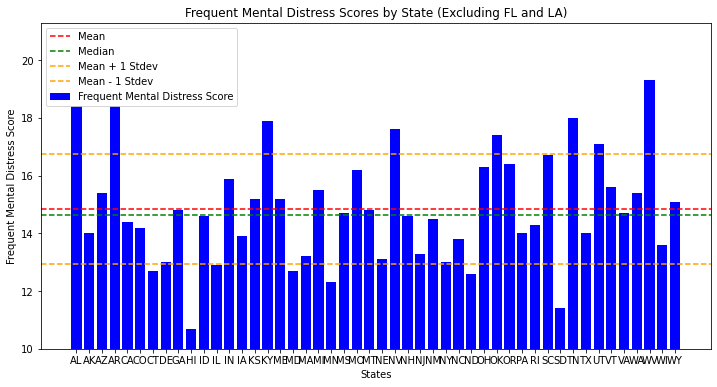

In [12]:
import matplotlib.pyplot as plt

bar_data = Concat_states.T[['Frequent Mental Distress (%)']]
bar_data = bar_data.drop('Total Population', errors='ignore')

excluded_states = ['FL', 'LA']
bar_data = bar_data[~bar_data.index.isin(excluded_states)]

mean_score = bar_data['Frequent Mental Distress (%)'].mean()
median_score = bar_data['Frequent Mental Distress (%)'].median()
stdev_score = bar_data['Frequent Mental Distress (%)'].std()

plt.figure(figsize=(12, 6))
plt.bar(bar_data.index, bar_data['Frequent Mental Distress (%)'], color='blue', label='Frequent Mental Distress Score')
plt.axhline(y=mean_score, color='red', linestyle='--', label='Mean')
plt.axhline(y=median_score, color='green', linestyle='--', label='Median')
plt.axhline(y=mean_score + stdev_score, color='orange', linestyle='--', label='Mean + 1 Stdev')
plt.axhline(y=mean_score - stdev_score, color='orange', linestyle='--', label='Mean - 1 Stdev')
plt.ylim(10, max(bar_data['Frequent Mental Distress (%)']) + 2)
plt.xlabel('States')
plt.ylabel('Frequent Mental Distress Score')
plt.title('Frequent Mental Distress Scores by State (Excluding FL and LA)')
plt.legend()
plt.show()


## Discussion

#### Individual Categories
We found that the health and social metrics which had the highest correlations with Frequent mental distress were:

Social and Economic Factors,Firearm Deaths, percantage of people in poverty, Food insecurity, Social support, Adverse Childhood experiences, Access to clinical care and dental visits, flu vaccinations, at-risk behaviors, teen births, Smoking and Tobacco Usage, e-cigarrete usage, general health outcomes, drug usage, physical health and distress, chronic conditions, arthritis, cardiovascular, kidney, and pulmonary diseases, depression, diabetes, and high blood pressure.

While this list may seem fairly obvious, it is necesarry to note that the features were included as long they had a correlation with Frequent Mental distress of over 0.5. And while they may have a correlation with mental distress, there is no conclusion for causation.



#### Machine Learning Model

Our KNN model had an R-squared value of 0.71, and a Mean Squared Error of 0.8445. The mean squared is fairly low, indicating a good fit of the model. The R^2 value being 0.71 indicates a fair fit, however considering the number of variables factored in, the R^2 score may acceptable.

We are also able  see the scores model predicted for known values of mental distress, which are fairly similar to the real values.


#### Testing the model

We were able to input arbitrary feature values and recieve an appropriate predicted Frequent mental distress score, which answers our original question: how can we identify othercommunities with low positive mental-health outcomes?

It is important to keep in mind however, that this data is based on American populations. It may be true that people in other countries and cultures may experience mental health issues due to completely different factors (ongoing wars, better weather, cultural behavior, etc). This predictive model may only be fit for those communities who experience mental distress in a similar way to Americans.


## Takeaway
Our team remains optimistic about the potential insights that could be gained from our analysis. The visualizations, including the correlation heatmap and the scatter plots, suggest that while some relationships between mental health distress and various socioeconomic and health-related factors are evident, the complexity of mental health issues demands an approach that considers many elements. Other variables such as access to mental health services, educational programs, and community support structures may further enhance our analysis. Since we have many factors that are into play, more advanced techniques, such as Random Forests, could provide a deeper understanding of the most influential factors.


### References

U.S. Census Bureau. (n.d.). 2022 Annual Report. America’s Health Rankings. https://www.americashealthrankings.org/